In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dia = load_diabetes()

In [4]:
dia.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
X = pd.DataFrame(data = dia.data, columns = dia.feature_names)
y = pd.DataFrame(data = dia.target, columns = ['y'])

In [6]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


(None, None)

In [7]:
df = pd.merge(X, y, left_index = True, right_index = True)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [8]:
df.isnull().sum()
df = df.dropna()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64

In [10]:
df.duplicated().sum()
df = df.drop_duplicates()

0

<Axes: >

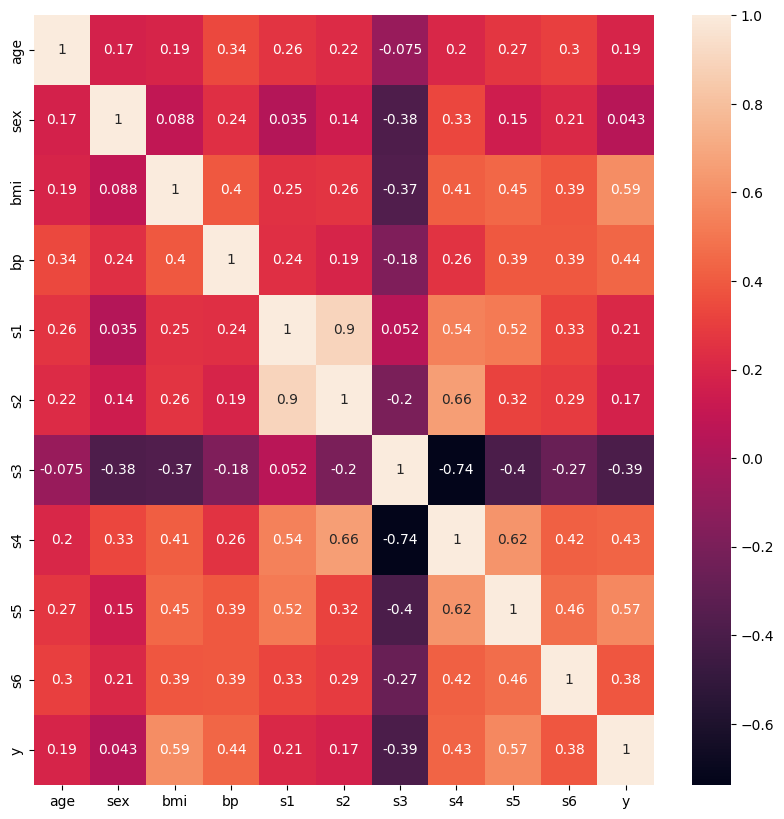

In [12]:
# 히트맵
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

In [19]:
print(sns.pairplot(df))

Output hidden; open in https://colab.research.google.com to view.

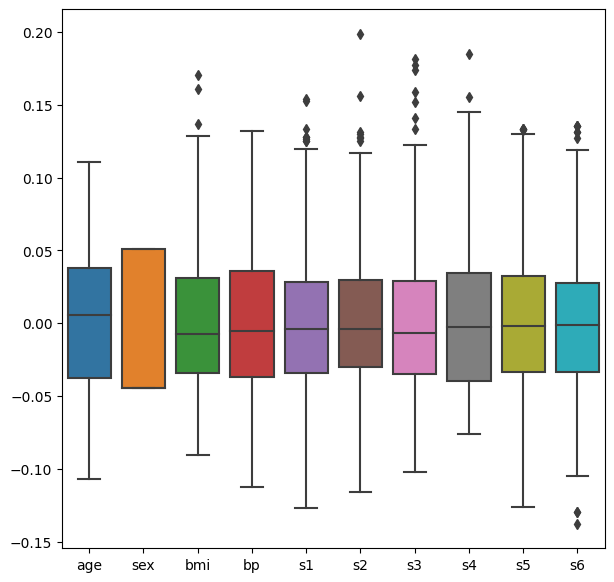

In [14]:
plt.figure(figsize = (7, 7))
sns.boxplot(data = df.drop("y", axis = 1))
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [16]:
X = df.drop(["sex", "y", 's4'], axis = 1)
y = df['y']
s_y = (y - y.min()) / (y.max() - y.min())

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, s_y, random_state = 42, test_size = 0.3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((309, 8), (133, 8), (309,), (133,))

In [18]:
test_df = pd.read_csv("data_0818.csv", encoding = 'utf-8')
test_df

FileNotFoundError: ignored

In [ ]:
test_df_X = test_df.drop(["sex", "y", 's4'], axis = 1)
test_df_y = test_df['y']
s_test_df_y = (test_df_y - test_df_y.min()) / (test_df_y.max() - test_df_y.min())

In [ ]:
test_df_X.shape, s_test_df_y.shape

In [ ]:
m = LinearRegression()
m1 = KNeighborsRegressor()
m2 = DecisionTreeRegressor()
m3 = Lasso()
m4 = Ridge()
m_l = [m, m1, m2, m3, m4]
for i in m_l:
    i.fit(train_x, train_y)
    pre_train_y = i.predict(train_x)
    pre_test_y = i.predict(test_x)
    pre_test_df_y = i.predict(test_df_X)
    print(f"""{i} : {i.score(train_x, train_y)}, {i.score(test_x, test_y)}, {i.score(test_df_X, s_test_df_y)}""")
    print(f"""{i} : {mean_squared_error(train_y, pre_train_y)}, {mean_squared_error(test_y, pre_test_y)}, {mean_squared_error(s_test_df_y, pre_test_df_y)}""")
    print("")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

fr = RandomForestRegressor(n_estimators = 100, random_state = 42)
fr.fit(train_x, train_y)
y_pred = fr.predict(test_df_X)
mse = mean_squared_error(s_test_df_y, y_pred)
print(f"""{fr.score(train_x, train_y)}, {fr.score(test_x, test_y)}. {fr.score(test_df_X, s_test_df_y)}""")
print(mse)

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(m2, filled=True, fontsize=10)

In [ ]:
m.fit(train_x, train_y)
m.score(train_x, train_y), m.score(test_x, test_y)

In [ ]:
m1.fit(train_x, train_y)
m1.score(train_x, train_y), m1.score(test_x, test_y)

In [ ]:
m2.fit(train_x, train_y)
m2.score(train_x, train_y), m2.score(test_x, test_y)

In [ ]:
m3.fit(train_x, train_y)
m3.score(train_x, train_y), m3.score(test_x, test_y)

In [ ]:
m4.fit(train_x, train_y)
m4.score(train_x, train_y), m4.score(test_x, test_y)